# PyTransit Quickstart

*PyTransit* comes with a set of transit models that share a common interface (API). However, except for some specific use-cases, you will pretty much always want to use the *RoadRunner Model* (or *RRModel* for short). The details of the model can be found from the RoadRunner-specific example notebooks, but these examples should help you to get started. 

In [1]:
%matplotlib inline

In [2]:
from matplotlib import rc
from matplotlib.pyplot import setp, subplots
from numpy import linspace, pi
from numpy.random import uniform, normal, seed

In [3]:
rc('figure', figsize=(13,5))

def plot_lc(time, flux, c=None, ylim=(0.9865, 1.0025), ax=None):
    if ax is None:
        fig, ax = subplots()
    else:
        fig, ax = None, ax
    ax.plot(time, flux, c=c)
    ax.autoscale(axis='x', tight=True)
    setp(ax, xlabel='Time [d]', ylabel='Flux', xlim=time[[0,-1]], ylim=ylim)
    
    if fig is not None:
        fig.tight_layout()
    return ax

## Model import

First, we need to import the *RoadRunner Model* from *PyTransit*.

In [4]:
from pytransit import RRModel

## Model initialisation

After the import, the transit model needs to be initialised and set up. Here we first create a RoadRunnerModel uses the power-2 limb darkening law and set it up by giving it a set of mid-exposure times. Both the model initializer and the `set_data` method have plenty of additional optional arguments for more advanced model setups, but here we aim for simplicity.

In [5]:
tm = RRModel('power-2')
tm.set_data(time = linspace(-0.05, 0.05, 500))

## Basic evaluation

After the transit model has been initialised, it can be evaluated using the `evaluate` method. The method arguments are 

- `k:` the planet-star radius ratio,
- `ldc:` limb darkening model coefficients,
- `t0:` the zero epoch,
- `p:` the orbital period,
- `a:` the orbital semi-major axis divided by the stellar radius,
- `i:` the orbital inclination in radians,
- `e:` the orbital eccentricity (optional, can be left out if assuming circular a orbit), and
- `w:` the argument of periastron in radians (also optional, can be left out if assuming circular a orbit).

**Note:** The first model evaluation will take some time because Numba needs to compile the model. The evaluation will be very fast after the first `evaluate` call.

**Note:** The model initialization takes 


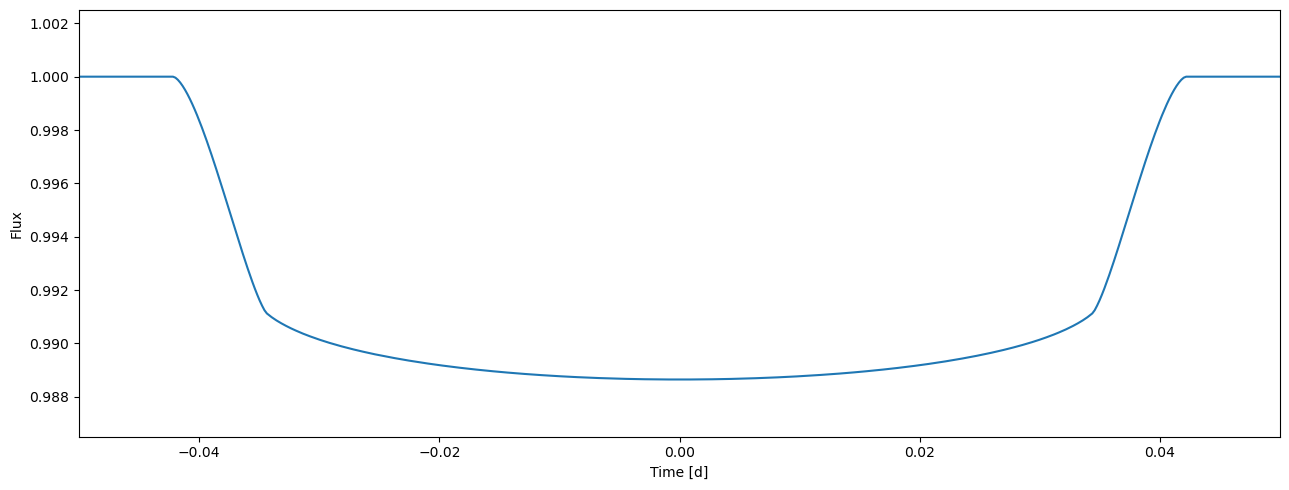

In [6]:
flux = tm.evaluate(k=0.1, ldc=[0.6, 0.5], t0=0.0, p=1.0, a=4.2, i=0.5*pi, e=0.0, w=0.0)
plot_lc(tm.time, flux);

## Evaluation for a set of parameters

In the most simple case the limb darkening coefficients are given as a single vector and the rest of the parameters are
scalars, in which case the `flux` array will also be one dimensional. However, if we want to evaluate the model for multiple parameter values (such as when using *emcee* for MCMC
sampling), giving a 2D array of limb darkening coefficients and the rest of the parameters as vectors allows PyTransit
to evaluate the models in parallel, which can lead to significant performance improvements (especially with the OpenCL
versions of the transit models). Evaluating the model for `n` sets of parameters will result in a `flux` array with a
shape  `(n, time.size)`.

**Note:** The first model evaluation will again take some time because Numba needs to compile the model optimised for a parameter set. The evaluation will be very fast after the first `evaluate` call.


In [7]:
npv = 5
seed(1)
ks    = normal(0.10, 0.002, (npv, 1))
t0s   = normal(0, 0.001, npv)
ps    = normal(1.0, 0.01, npv)
smas  = normal(4.2, 0.1, npv)
incs  = uniform(0.49*pi, 0.5*pi, npv)
es    = uniform(0, 0.15, size=npv)
ws    = uniform(0, 2*pi, size=npv)
ldc   = uniform(0.5, 0.7, size=(npv,1,2))

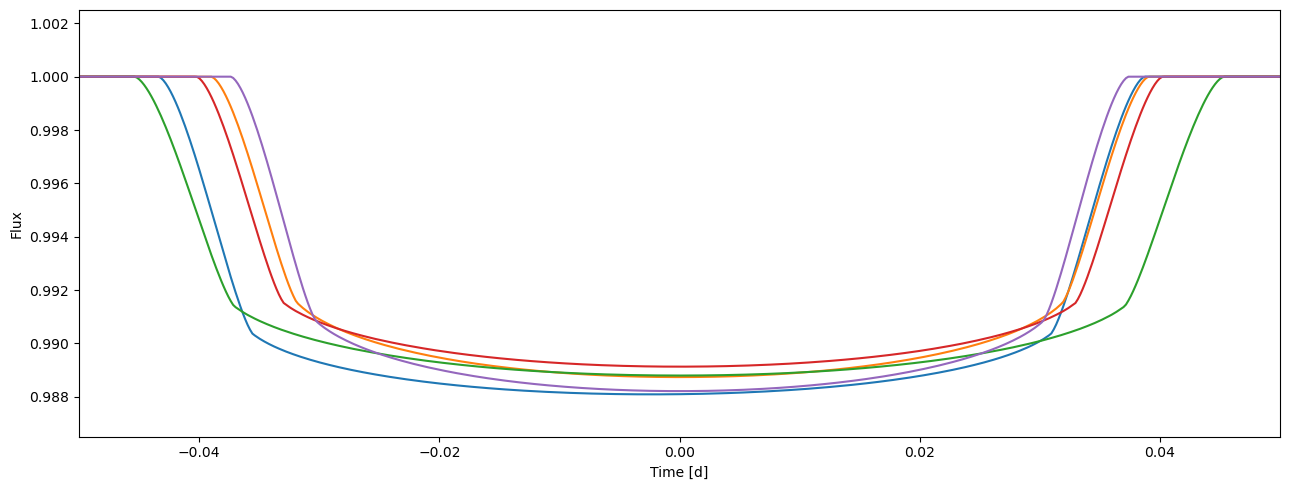

In [8]:
flux = tm.evaluate(ks, ldc, t0s, ps, smas, incs, es, ws)
plot_lc(tm.time, flux.T);

---

<center>©2024 Hannu Parviainen</center>